In [60]:
#    STEP 1:
# Load the experiment data by import load_svmlight_file function in sklearn library
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt 
import numpy as np

#this function to read the experiment of data
def getData(fileName): # fileName:  path of the data
    
	data = load_svmlight_file(fileName)
	return data[0], data[1] #return data: data [0] The data matrix, each row is a sample, each column is a dimension
                                        # data [1] is an array of predictions for each sample

#this function to Add a column after the matrix data
def addColumnData(dataMatrix, dataType): 
   
    row, col = dataMatrix.shape
    onesArray = np.ones(row)
    dataArray = dataMatrix.toarray()
    if dataType == "train":
        dataTrans = np.column_stack((dataArray, onesArray))
    elif dataType == 'test':
        zeroArray = np.zeros(row)
        tempTrans = np.column_stack((dataArray, zeroArray))
        dataTrans = np.column_stack((tempTrans, onesArray))
    return dataTrans

In [61]:
fileName = 'datasets/a9a' #path of the data
dataMatrix, dataLabel = getData(fileName)
dataArray = addColumnData(dataMatrix, "train")

In [62]:
dataArray.shape

(32561, 124)

In [63]:
testFileName = 'datasets/a9a.t' 
testDataMatrix, testDataLabel = getData(testFileName)
testDataArray = addColumnData(testDataMatrix, 'test')

In [64]:
testDataArray.shape

(16281, 124)

In [65]:
# this function  for Initialize the weights
def initialWeights(data, initialModel = None): 

	row, col = data.shape
	if initialModel == None:
		weights = np.zeros(col)
	elif initialModel == "random":
		weights = np.random.rand(col)
	elif initialModel == "normality":
		weights = np.random.standard_normal(col)
	return weights # Returns the weight value

In [66]:
# this function perform Calculate y * W * x
def getYWX(dataMatrix, dataLabel, weightsParam): 
	predictTemp = dataMatrix * weightsParam
	predictValueArray = predictTemp.sum(axis = 1)
	tempValue = dataLabel * predictValueArray 
	return np.longfloat(tempValue)

In [67]:
# this function for Calculate loss value
def lossFunction(dataMatrix, dataLabel, weightsParam, lamb): 
    
    yWX = getYWX(dataMatrix, dataLabel, weightsParam)
    row, col = dataMatrix.shape
    onesArray = np.ones(row)
    eYWX = np.longfloat(np.exp((-1) * yWX))
    addEYWX = onesArray + eYWX
    logETWX = np.log(addEYWX)
    meanETWX = np.mean(logETWX)
    w2 = np.sum(weightsParam * weightsParam) * lamb * 0.5
    loss = meanETWX + w2
    return loss

In [68]:
def minibatchData(dataMatrix, dataLabel, sampleNum):
    row, col = dataMatrix.shape
    randNum = np.random.randint(0, row-51)
    miniData = dataMatrix[randNum:(randNum+sampleNum), :]
    miniDataLabel = dataLabel[randNum:(randNum+sampleNum)]
    return miniData, miniDataLabel

In [69]:
#this function  Stochastic gradient declines
def stochasticGradientDescent(dataMatrix, dataLabel, weightsParam, lamb):
      
    miniDataMatrix, miniDataLabel = minibatchData(dataMatrix, dataLabel, 50)
    row, col = miniDataMatrix.shape
    YWX = getYWX(miniDataMatrix, miniDataLabel, weightsParam)
    eYWX = np.exp(YWX)
    onesArray = np.ones(row)
    addEYWX = onesArray + eYWX
    transData = np.transpose(miniDataMatrix)
    temp = transData / addEYWX * miniDataLabel * (-1)
    G = np.mean(temp, axis=1) + lamb * weightsParam
    return G

In [70]:
#this function for update weights
def updataWeights(weightsParam, D, alpha):

	newWeights = weightsParam - alpha * D
	return newWeights

In [71]:
def addV(weightsParam, v, alpha):
    newWeights = weightsParam - alpha * v
    return newWeights    

In [72]:
def  plotPicture(LossList1, LossList2, LossList3, LossList4):
    
    plt.title('loss value vary')
    plt.plot(LossList1, color="blue", linewidth=2.5, linestyle = "-", label="NAGLoss")
    plt.plot(LossList2, color="red", linewidth=2.5, linestyle="-", label="RMSPropLoss")
    plt.plot(LossList3, color="green", linewidth=2.5, linestyle="-", label="AdadeltaLoss")
    plt.plot(LossList4, color="black", linewidth=2.5, linestyle="-", label="AdamLoss")
    plt.legend(loc="upper right")
    plt.xlabel("Figure1")
    plt.ylabel("loss")
    plt.show()

In [73]:
def NAGUpdateWeights(weightsParam, v, D, alpha1, alpha2):
   
    newV = alpha1 * v + alpha2 * D
    newWeights = weightsParam - newV
    return newWeights, newV

In [74]:
def RMSPROPUpdateWeights(weightsParam, D, decayRate, cacheParam, learningRate):  
    eps = 1.0e-8
    newcache = decayRate * cacheParam + (1 - decayRate) * D * D
    newWeights = weightsParam - learningRate * D / (np.sqrt(newcache+ eps))
    return newWeights, newcache

In [75]:
def adaDeltaUpdateWeights(weightsParam, DParam, GTParam, deltaParam, GRateParam):
    eps = 1.0e-6
    newGT = GRateParam * GTParam + (1 - GRateParam) * DParam * DParam
    tempValue = np.sqrt(deltaParam + eps) / np.sqrt(newGT + eps) * DParam * (-1)
    newWeights = weightsParam + tempValue
    newdelta = GRateParam * deltaParam + (1-GRateParam) * tempValue * tempValue
    return newWeights, newGT, newdelta

In [76]:
def adamUpdateWeights(weightsParam, DParam, mParam, vParam, belta1, belta2, alpha, t): # Adam updates weight
    
    eps = 1.0e-6
    newM = belta1 * mParam + (1-belta1) * DParam
    newV = belta2 * vParam + (1-belta2) * DParam * DParam
    tempM = newM / (1-np.power(belta1,t))
    tempV = newV / (1-np.power(belta2,t))
    newWeights = weightsParam - alpha * tempM / (np.sqrt(tempV) + eps)
    return newWeights, newM, newV

In [77]:
# from here start the program 
def run():
    
    fileName = 'datasets/a9a'
    dataMatrix, dataLabel = getData(fileName)
    dataArray = addColumnData(dataMatrix, "train")
    testFileName = 'datasets/a9a.t'
    testDataMatrix, testDataLabel = getData(testFileName)
    testDataArray = addColumnData(testDataMatrix, 'test')
    weights = initialWeights(testDataArray, initialModel = "random")
    weightsRms = initialWeights(testDataArray, initialModel = "random")
    weightsAda = initialWeights(testDataArray, initialModel = 'random')
    weightsAdam = initialWeights(testDataArray, initialModel = "random")
    vNAG = initialWeights(testDataArray, initialModel = None)
    cache = initialWeights(testDataArray, initialModel = None)
    GT = initialWeights(testDataArray, initialModel = None)
    delta = initialWeights(testDataArray, initialModel = None)
    adamM = initialWeights(testDataArray, initialModel = None)
    adamV = initialWeights(testDataArray, initialModel = None)
    NAGLossList = []
    RMSLossList = []
    ADALossList = []
    AdamLossList = []
    iterNum = 200
    alpha1 = 0.9  #NAG parameters
    alpha2 = 0.01  #learnRate
    alpha3 = 0.5  # Loss function parameters in the weights
    decayRate = 0.9
    GRate = 0.95
    belta1 = 0.9
    belta2 = 0.999
    adamAlpha = 0.01
    for i in range(iterNum):
        #NAG
        testLoss = lossFunction(testDataArray, testDataLabel, weights, alpha3)
        NAGLossList.append(testLoss)
        weightNAG = addV(weights, vNAG, alpha1)
        DNAG = stochasticGradientDescent(dataArray, dataLabel, weightNAG, alpha3)
        weights, vNAG =NAGUpdateWeights(weightNAG, vNAG, DNAG, alpha1, alpha2)
        #RMSprop
        testLoss1 = lossFunction(testDataArray, testDataLabel, weightsRms, alpha3)
        RMSLossList.append(testLoss1)
        DRMS = stochasticGradientDescent(dataArray, dataLabel, weightsRms, alpha3)
        weightsRms, cache = RMSPROPUpdateWeights(weightsRms, DRMS, decayRate, cache, alpha2)
        #adaDelta
        testLoss2 = lossFunction(testDataArray, testDataLabel, weightsAda, alpha3)
        ADALossList.append(testLoss2)
        DADA = stochasticGradientDescent(dataArray, dataLabel, weightsAda, alpha3)
        weightsAda, GT, delta = adaDeltaUpdateWeights(weightsAda, DADA, GT, delta, GRate)
        #Adam
        testLoss3 = lossFunction(testDataArray, testDataLabel, weightsAdam, alpha3)
        AdamLossList.append(testLoss3)
        DAdam = stochasticGradientDescent(dataArray, dataLabel, weightsAdam, alpha3)
        weightsAdam, adamM, adamV = adamUpdateWeights(weightsAdam, DAdam, adamM, adamV, belta1, belta2, adamAlpha, i+1)
    plotPicture(NAGLossList, RMSLossList, ADALossList, AdamLossList)

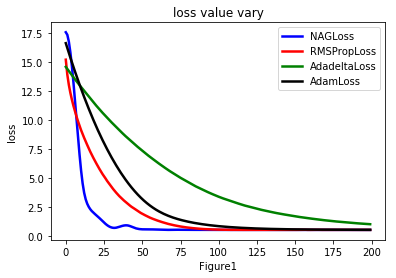

In [78]:
run()